# **Problem Definition**

# **Data Source & Description**

# **Libraries**

First, let's import necessary packages for further study.

In [ ]:
# Basic data handling and mathematical operations
import pandas as pd
import numpy as np
from scipy.stats import uniform
from scipy.stats import randint

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats
from scipy.stats import norm

# Machine learning - Data preprocessing
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Feature selection
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier

# Machine learning - Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Machine learning - Dimension Reduction
from sklearn.decomposition import PCA

# Machine learning - Pipeline and configuration
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

# Setting seaborn style
sns.set_style("whitegrid", {"grid.color": ".8", })

# Machine learning
# Classification models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model deployment
import joblib

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **Load Data**

Import data from UCI repository.

Then, we load the dataset and name it as 'data'.

In [ ]:
# Show all columns & rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the dataset
data = pd.read_csv('0EEFC5C2746DF0CDF06594480473538A_1709669335618.csv')
data.head()

,Business Name,Legal Name,Physical ZIP,Key Executive Name,First Name,Last Name,Location Employee Size,Corporate Employee Size,Revenue / Yr,County Name,County Population,Primary SIC,Primary SIC Description,NAICS 1,NAICS 1 Description,Non-Profit,Number of PCs,Public / Private,Small Business,Square Footage,Women Owned,Website,Year Established,Credit Score,2022 Revenue/Yr,2021 Revenue/Yr,2020 Revenue/Yr,2019 Revenue/Yr,2021 % Sales Growth,2020 % Sales Growth,2019 % Sales Growth,2022 Employees,2021 Employees,2020 Employees,2019 Employees,2021 % Employee Growth,2020 % Employee Growth,2019 % Employee Growth,Est. Utilities Annual Expense,Est. Accounting Annual Expense,Est. Advertising Annual Expense,Est. Business Insurance Annual Expense,Est. Legal Annual Expense,Est. Office Equipment Annual Expense,Est. Rent Annual Expense,Est. Technology Annual Expense,Est. Telecom Annual Expense,AtoZ ID,Home Based Business
0,Aloft Boston Seaport District,Aloft Hotels,2210,Allie Legere,Allie,Legere,21,389,"$1,000,000",Suffolk,"500,000 or more",7011001,Hotels & Motels,721110,Hotels (except Casino Hotels) and Motels,No,25 to 99,Public,No,"1,000 to 4,999",No,aloft-hotels.marriott.com,1927.0,93,1000000,830000,821700,928521,20.48,1.01,-11.50,21,17,14.0,17.0,23.53,21.43,-17.65,"$20,000 to $49,999","$5,000 to $24,999","$25,000 to $99,999","$20,000 to $49,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$10,000 to $24,999",1.114000e+13,No
1,Copley Court Reporting Inc,NaN,2109,Lisa Starr,Lisa,Starr,14,NaN,"$1,000,000",Suffolk,"500,000 or more",7338001,Secretarial & Court Reporting Services,561492,Court Reporting and Stenotype Services,No,10 to 24,Private,Yes,"1,000 to 4,999",Yes,www.copleycourt.com,1984.0,93,1000000,910000,755300,679770,9.89,20.48,11.11,14,12,13.0,15.0,16.67,-7.69,-13.33,"$7,500 to $19,999","$5,000 to $24,999","$15,000 to $24,999","$7,500 to $19,999","$25,000 to $99,999","$10,000 to $24,999","$10,000 to $24,999","$10,000 to $24,999","$5,000 to $9,999",1.113250e+13,No
2,Happy Tubs Bathtub Repair,NaN,2118,,NaN,NaN,6,NaN,"$1,000,000",Suffolk,"500,000 or more",3261001,Vitreous China Plumbing Fixtures & China & Ear...,327110,"Pottery, Ceramics, and Plumbing Fixture Manufa...",No,5 to 9,Private,Yes,"1,000 to 4,999",No,NaN,2023.0,69,1000000,960000,0,0,4.17,0.00,0.00,6,6,NaN,NaN,0.00,0.00,0.00,"$7,500 to $19,999","$5,000 to $24,999",Up to $999,"$7,500 to $19,999","$15,000 to $24,999","$5,000 to $9,999","$10,000 to $24,999","$25,000 to $99,999","$2,000 to $4,999",1.114000e+13,No
3,Glynn Hospitality Group,NaN,2109,Michael Glynn,Michael,Glynn,26,NaN,"$999,000",Suffolk,"500,000 or more",8741006,Restaurant Management,561110,Office Administrative Services,No,25 to 99,Private,Yes,"5,000 to 9,999",No,www.glynnhospitalitygroup.com,1997.0,91,999000,1078920,1003396,1083668,-7.41,7.53,-7.41,26,21,22.0,24.0,23.81,-4.55,-8.33,"$20,000 to $49,999","$25,000 to $99,999",NaN,"$20,000 to $49,999",NaN,"$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$10,000 to $24,999",1.113250e+13,No
4,Advanced Proteome Therapeutics Inc,NaN,2118,Bill Dickie,Bill,Dickie,24,NaN,"$999,000",Suffolk,"500,000 or more",8741001,Business Management,561110,Office Administrative Services,No,25 to 99,Private,Yes,"1,000 to 4,999",No,www.advancedproteome.com,2014.0,95,999000,1048950,849649,943110,-4.76,23.46,-9.91,24,25,23.0,27.0,-4.00,8.70,-14.81,"$20,000 to $49,999","$25,000 to $99,999",NaN,"$20,000 to $49,999",NaN,"$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$10,000 to $24,999",1.113250e+13,No


# **EDA**

In [ ]:
data = data[data["Small Business"] == 'Yes']

In [ ]:
cols_to_keep = [
    "Location Employee Size",
    "Revenue / Yr",
    "County Population",
    "Year Established",
    "2022 Revenue/Yr",
    "2021 Revenue/Yr",
    "2020 Revenue/Yr",
    "2019 Revenue/Yr",
    "2021 % Sales Growth",
    "2020 % Sales Growth",
    "2019 % Sales Growth",
    "2022 Employees",
    "2021 Employees",
    "2020 Employees",
    "2019 Employees",
    "2021 % Employee Growth",
    "2020 % Employee Growth",
    "2019 % Employee Growth",

    "Est. Utilities Annual Expense",
    "Est. Accounting Annual Expense",
    "Est. Advertising Annual Expense",
    "Est. Business Insurance Annual Expense",
    "Est. Legal Annual Expense",
    "Est. Office Equipment Annual Expense",
    "Est. Rent Annual Expense",
    "Est. Technology Annual Expense",
    "Est. Telecom Annual Expense",

    "County Name",
    "Public / Private",
    "Women Owned",
    "Home Based Business",
    "Credit Score"
]
data = data[cols_to_keep]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 1 to 223
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Location Employee Size                  208 non-null    int64  
 1   Revenue / Yr                            208 non-null    object 
 2   County Population                       208 non-null    object 
 3   Year Established                        206 non-null    float64
 4   2022 Revenue/Yr                         208 non-null    int64  
 5   2021 Revenue/Yr                         208 non-null    int64  
 6   2020 Revenue/Yr                         208 non-null    int64  
 7   2019 Revenue/Yr                         208 non-null    int64  
 8   2021 % Sales Growth                     208 non-null    float64
 9   2020 % Sales Growth                     208 non-null    float64
 10  2019 % Sales Growth                     208 non-null    float6

Columns with missing values are: ['Year Established', '2020 Employees', '2019 Employees', 'Est. Advertising Annual Expense ']

## Check Duplicates

After checking the missing values, we want to see if there is any duplicate in the dataset.

In [ ]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

The duplicates are dropped, and we now can move further.

## Identify categorical & numeric features

To train the model which predicts buyers' decisions, we may need to identify categorical and numeric variables first.

To have an overview of all of the features, we count the unique values and look at the data type of each of them.

In [ ]:
# Calculate the number of unique values and data types for each feature
unique_count = data.nunique()
data_types = data.dtypes

# Create a new DataFrame containing feature names, unique value counts, and data types
unique_count_df = pd.DataFrame({'Feature': unique_count.index, 'Unique Count': unique_count.values, 'Data Type': data_types}).reset_index(drop=True)

unique_count_df

,Feature,Unique Count,Data Type
0,Location Employee Size,26,int64
1,Revenue / Yr,29,object
2,County Population,4,object
3,Year Established,30,float64
4,2022 Revenue/Yr,29,int64
5,2021 Revenue/Yr,153,int64
6,2020 Revenue/Yr,152,int64
7,2019 Revenue/Yr,149,int64
8,2021 % Sales Growth,31,float64
9,2020 % Sales Growth,30,float64


In [ ]:
continuous_features = [
    "Year Established",
    "2022 Revenue/Yr",
    "2021 Revenue/Yr",
    "2020 Revenue/Yr",
    "2019 Revenue/Yr",
    "2022 Employees",
    "2021 Employees",
    "2020 Employees",
    "2019 Employees",
]

nominal_features = [
    "County Name",
    "Public / Private",
    "Women Owned",
    "Home Based Business"
]

ordinal_features = [
    "Est. Utilities Annual Expense",
    "Est. Accounting Annual Expense",
    "Est. Advertising Annual Expense",
    "Est. Business Insurance Annual Expense",
    "Est. Legal Annual Expense",
    "Est. Office Equipment Annual Expense",
    "Est. Rent Annual Expense",
    "Est. Technology Annual Expense",
    "Est. Telecom Annual Expense",
]

categorical_features = nominal_features + ordinal_features

## Visualize Target

The problem we are trying to solve is a binary classification where 'Revenue' should be viewed as our target. The 'Revenue' column contains two unique values, True and False, determining if a customer makes a purchase.

To see how the results are distributed and if we should make any adjustment when training the model, we count the number of True and False, and visualize it.

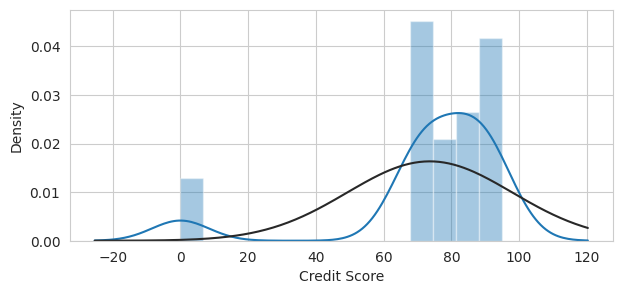

In [ ]:
# Plot the distribution of 'LotFrontage' values
plt.figure(figsize=(7, 3))
sns.distplot(data['Credit Score'],fit = norm)
plt.show()

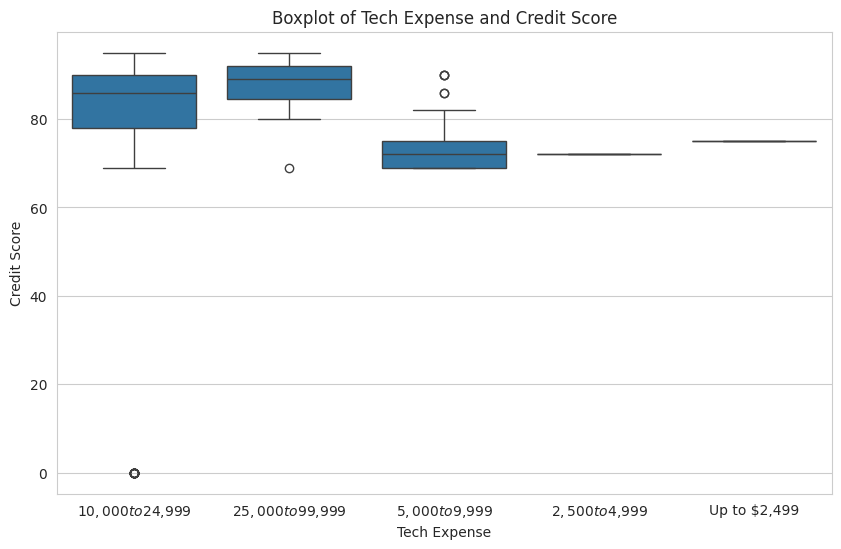

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Est. Technology Annual Expense", y="Credit Score", data=data)
plt.xlabel("Tech Expense")
plt.ylabel("Credit Score")
plt.title("Boxplot of Tech Expense and Credit Score")

# Show the plot
plt.show()

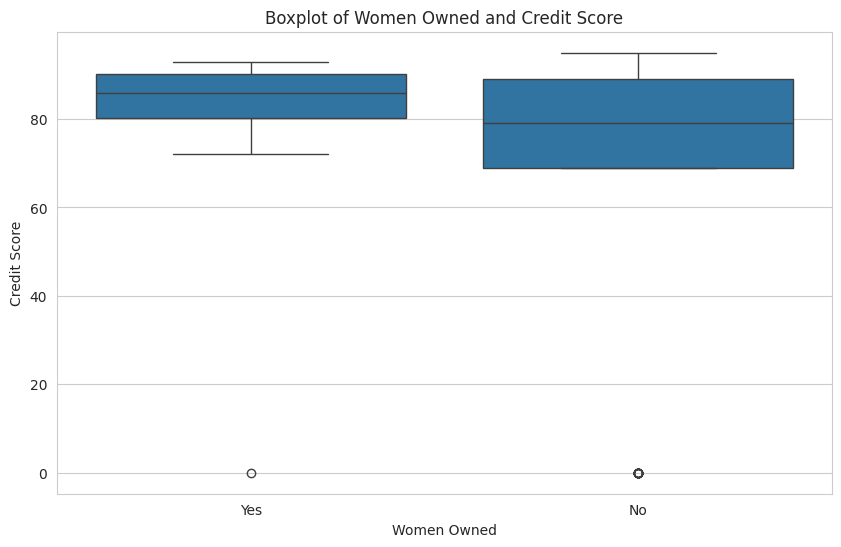

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Women Owned", y="Credit Score", data=data)
plt.xlabel("Women Owned")
plt.ylabel("Credit Score")
plt.title("Boxplot of Women Owned and Credit Score")

# Show the plot
plt.show()

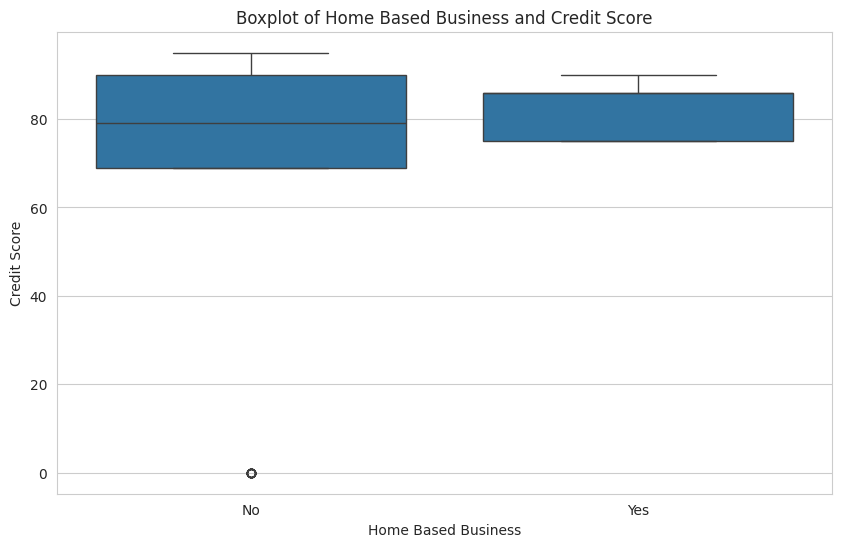

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Home Based Business", y="Credit Score", data=data)
plt.xlabel("Home Based Business")
plt.ylabel("Credit Score")
plt.title("Boxplot of Home Based Business and Credit Score")

# Show the plot
plt.show()

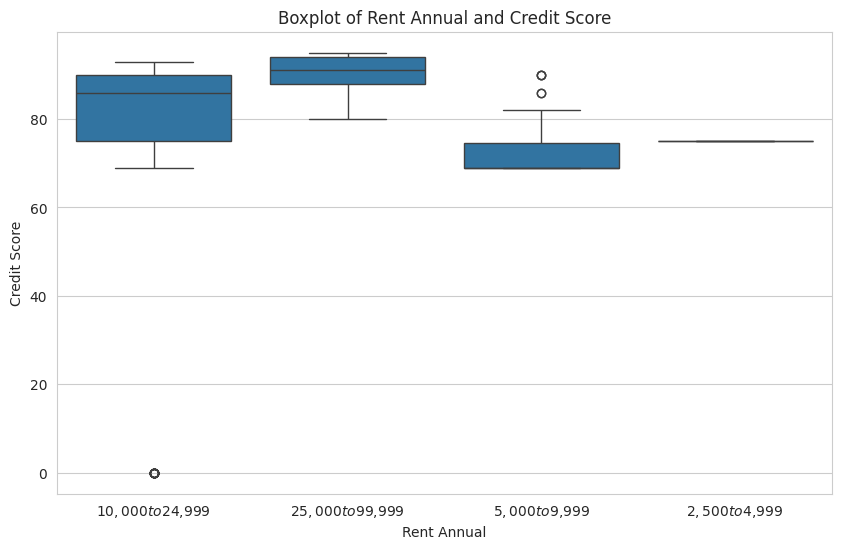

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Est. Rent Annual Expense", y="Credit Score", data=data)
plt.xlabel("Rent Annual")
plt.ylabel("Credit Score")
plt.title("Boxplot of Rent Annual and Credit Score")

# Show the plot
plt.show()
 #   "Est. Legal Annual Expense",
  #  "Est. Office Equipment Annual Expense",
  #  "Est. Rent Annual Expense",

## Visualize numerical features

To understand the relationships between numerical features, we use pairplot to visualize the correlations.

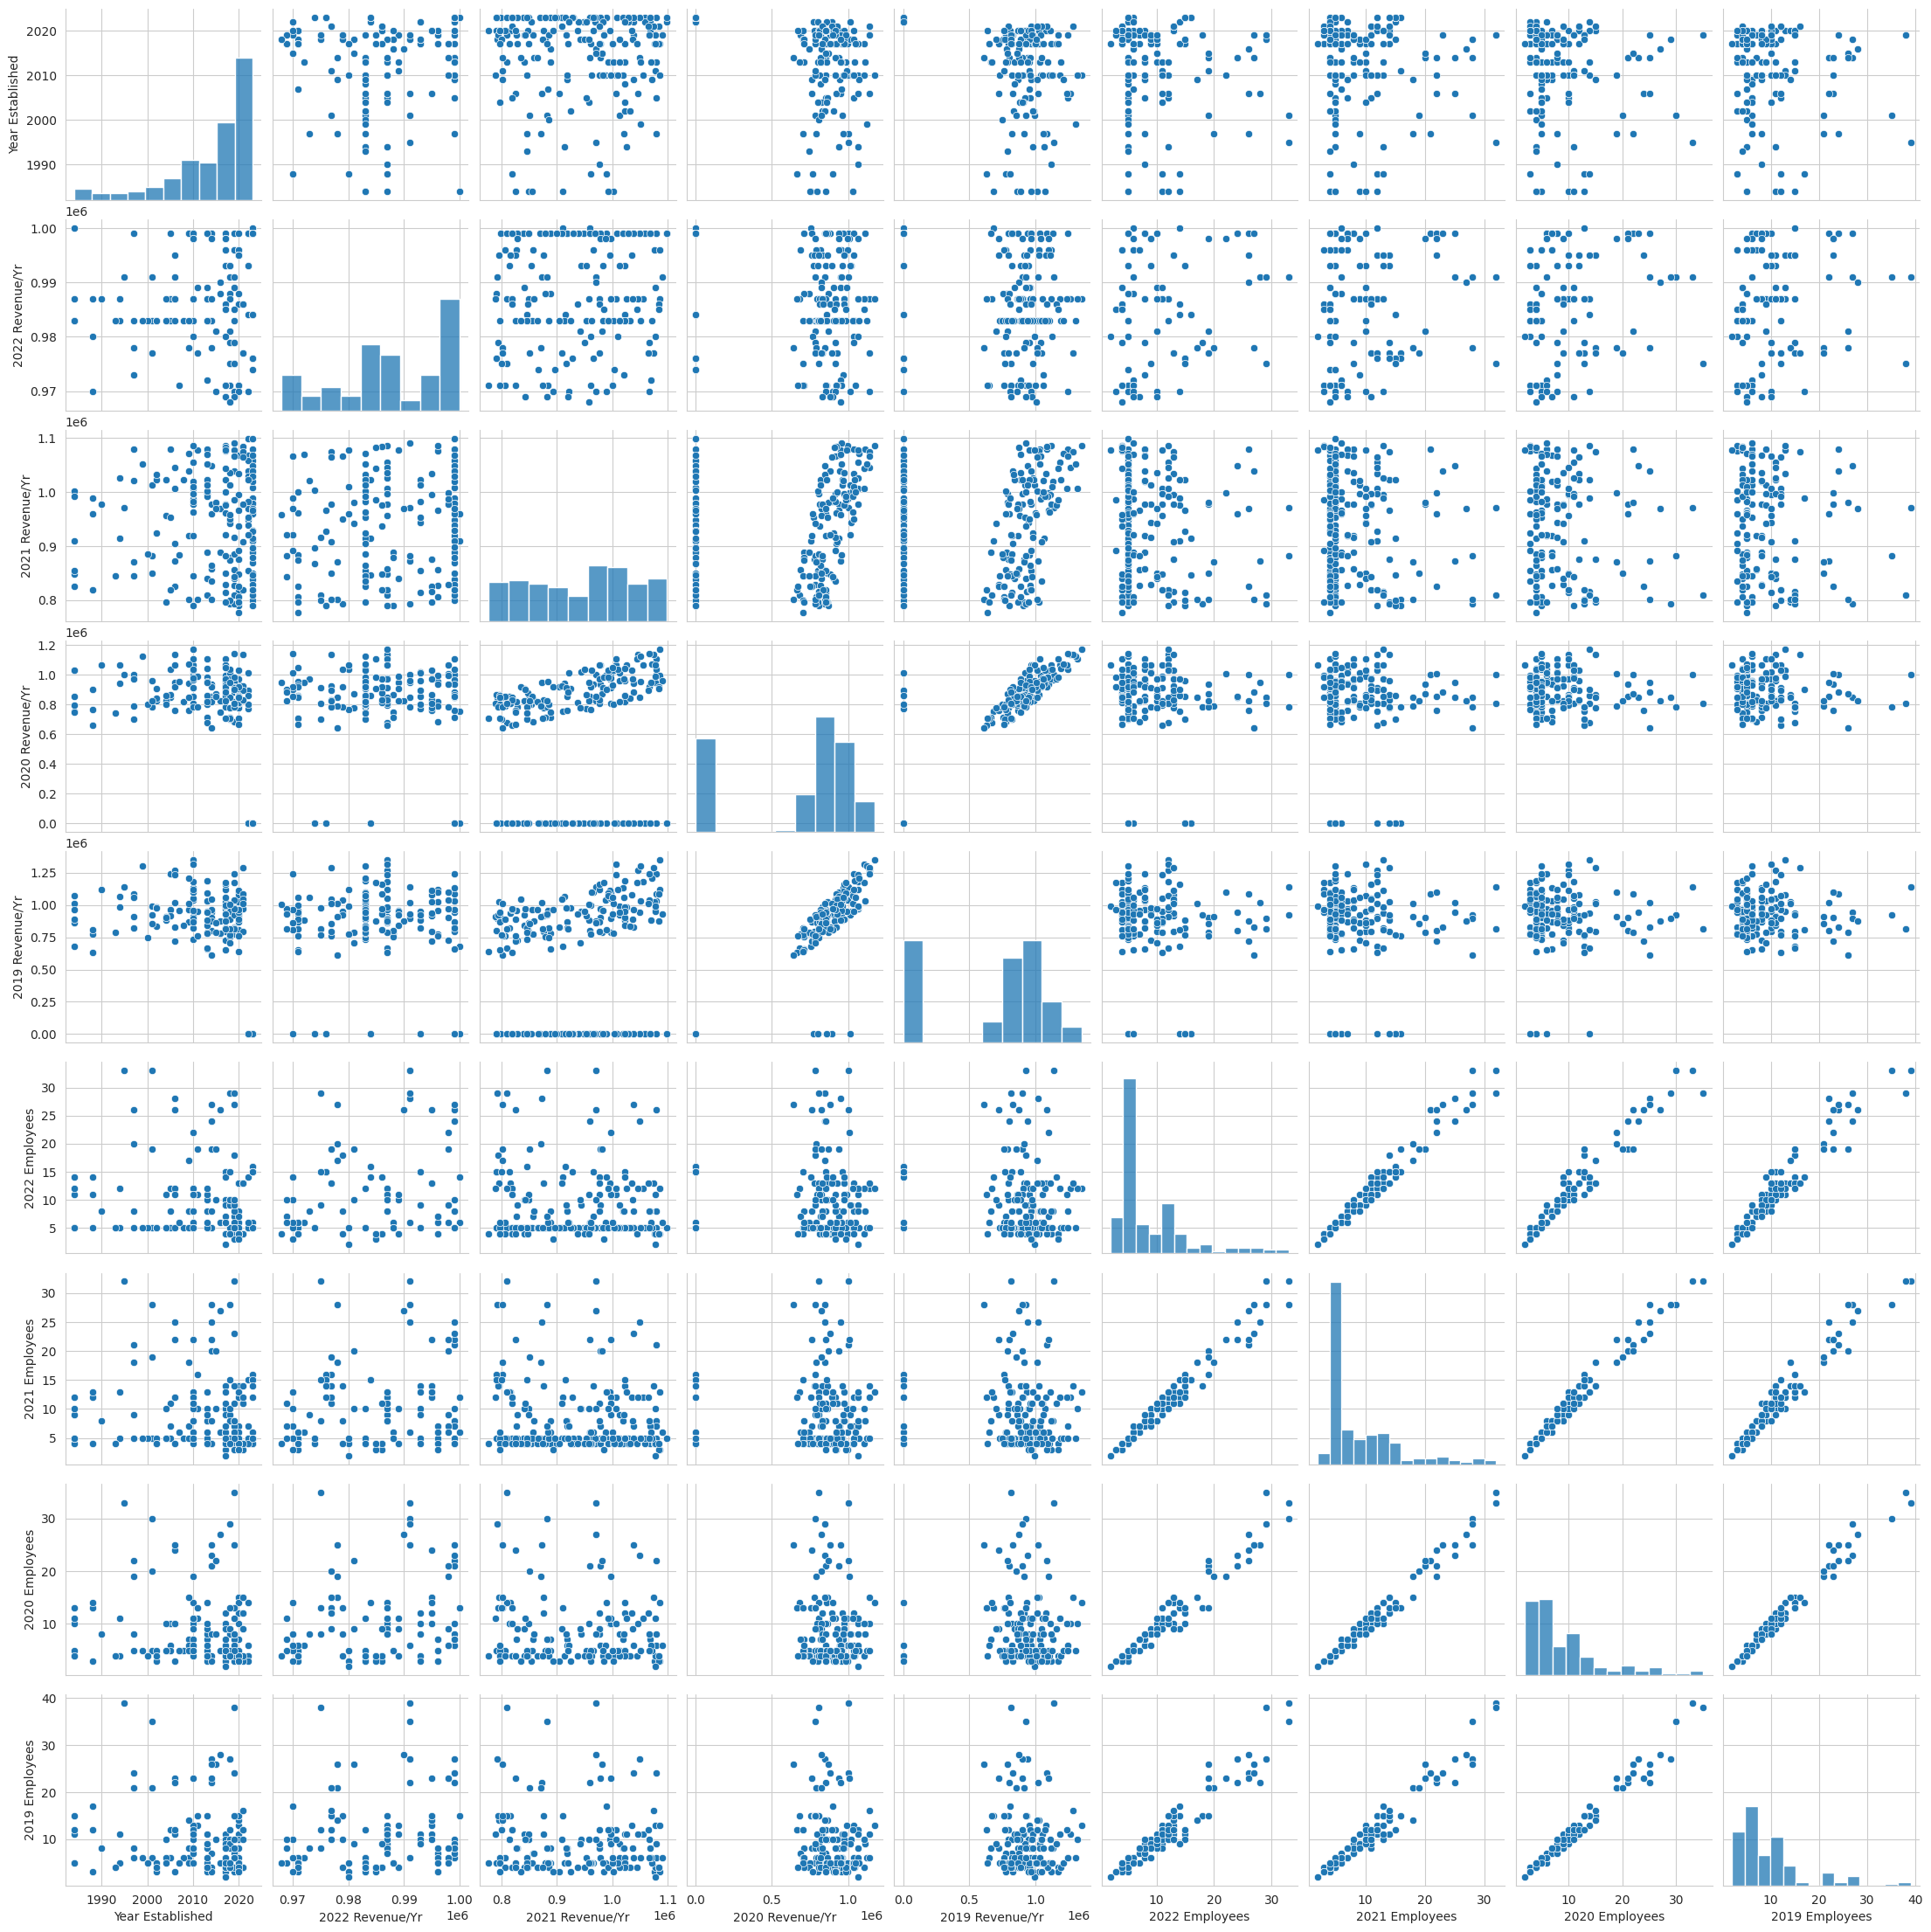

In [ ]:
# Plot pairplot for continuous numeric features
sns.pairplot(data, vars=continuous_features)
plt.show()

Multicolinearity exists between: ["2019 Employees", "2020 Employees", "2021 Employees", "2022 Employees"] & ["2019 Revenue/Yr", "2022 Revenue/Yr"]

## Correlation analysis

To better understand the observations we just found out from the pairplot, we create the correlation matrix and see how continuous features correlate with each other.

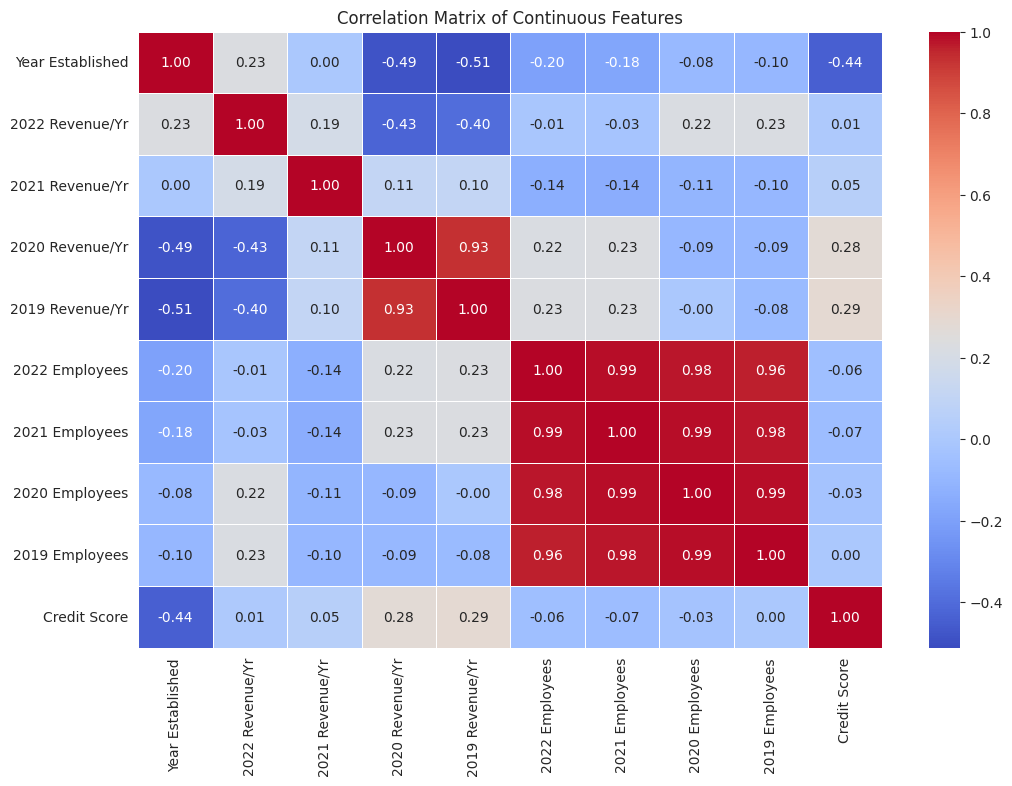

In [ ]:
# Compute the correlation matrix
correlation_matrix = data[continuous_features+['Credit Score']].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Continuous Features")
plt.show()

# **Pipeline**

After cleaning our data and having an insight of them, we are ready to build the pipeline which helps us prepare the data to build the models.

Since 'Revenue' is the target that we want to predict, we drop it from the input group (X), and make it the target group (y).

In [ ]:
data["Est. Legal Annual Expense"].fillna('$0', inplace = True)
data["Est. Advertising Annual Expense"].fillna('$0', inplace = True)

In [ ]:
X = data[continuous_features+nominal_features+ordinal_features]
y = data['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 223
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Established                        203 non-null    float64
 1   2022 Revenue/Yr                         205 non-null    int64  
 2   2021 Revenue/Yr                         205 non-null    int64  
 3   2020 Revenue/Yr                         205 non-null    int64  
 4   2019 Revenue/Yr                         205 non-null    int64  
 5   2022 Employees                          205 non-null    int64  
 6   2021 Employees                          205 non-null    int64  
 7   2020 Employees                          153 non-null    float64
 8   2019 Employees                          148 non-null    float64
 9   County Name                             205 non-null    object 
 10  Public / Private                        205 non-null    object

Then, since we have different types of data, we will have to handle them differently in the pipeline for further model building.

First, to handle highly skewed distributions, for example, the Administrative we have seen in the previous pairplot, we standardize them and make the data more normally distributed.

Then, to reduce the dimensionality for, for instance, the relationship between ProductRelated and ProductRelated_Duration, we apply Principal Component Analysis (PCA) to transform them.

Lastly, to handle categorical variables, we apply OneHotEncoder to make them into dummy variables.

## Preprocessing Pipeline

In [ ]:
ordinal_feature_mapping = [

    ('Est. Utilities Annual Expense', ["Up to $2,499 ", "$2,500 to $7,499", "$7,500 to $19,999", "$20,000 to $49,999 ", "$50,000 to $99,999"]),
    ("Est. Accounting Annual Expense", ['$1,000 to $2,499', '$2,500 to $4,999', '$5,000 to $24,999', '$25,000 to $99,999']),
    ("Est. Advertising Annual Expense", ['$0', 'Up to $999', '$1,000 to $4,999', '$5,000 to $14,999', '$15,000 to $24,999', '$25,000 to $99,999']),
    ("Est. Business Insurance Annual Expense", ['Up to $2,499', '$2,500 to $7,499', '$7,500 to $19,999', '$20,000 to $49,999']),
    ("Est. Legal Annual Expense", ['$0', '$2,500 to $7,499', '$7,500 to $14,999', '$15,000 to $24,999', '$25,000 to $99,999']),
    ("Est. Office Equipment Annual Expense", ['$2,000 to $4,999', '$5,000 to $9,999', '$10,000 to $24,999', '$25,000 to $99,999']),
    ("Est. Rent Annual Expense", ['$2,500 to $4,999', '$5,000 to $9,999', '$10,000 to $24,999', '$25,000 to $99,999']),
    ("Est. Technology Annual Expense", ['Up to $2,499', '$2,500 to $4,999', '$5,000 to $9,999', '$10,000 to $24,999', '$25,000 to $99,999']),
    ("Est. Telecom Annual Expense", ['Up to $1,999', '$2,000 to $4,999', '$5,000 to $9,999', '$10,000 to $24,999'])
]


In [ ]:
# Logarithmic transform & Standardize to handle skewed distributions
log_std_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler()
)

# PCA to reduce the dimensionality
pca_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log1p),
    StandardScaler(),
    PCA(n_components=1)
)

# OneHotEncoder to make categorical features into dummy variables
onehotencoder_pipeline = make_pipeline(
    OneHotEncoder(drop="first", handle_unknown='ignore', sparse = False), # drop first to avoid multicolinearity, igore unseen values in the train set
    )

# ordinal mapping
ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[mapping[1] for mapping in ordinal_feature_mapping], handle_unknown='use_encoded_value', unknown_value=-1)),
])

# Target should be excluded from the pipeline since all data went through pipline will be considered as features(i.e. X) in the training process
prepare_pipeline = ColumnTransformer([
    ('numerical', log_std_pipeline, [col for col in continuous_features if col not in ["2019 Employees", "2020 Employees", "2021 Employees", "2022 Employees", "2019 Revenue/Yr", "2022 Revenue/Yr"]]),
    ('multicollinearity_employee', pca_pipeline, ["2019 Employees", "2020 Employees", "2021 Employees", "2022 Employees"]),
    ('multicollinearity_revenue', pca_pipeline, ["2019 Revenue/Yr", "2022 Revenue/Yr"]),
    ('nominal', onehotencoder_pipeline, nominal_features),
    ('ordinal', ordinal_pipeline, [mapping[0] for mapping in ordinal_feature_mapping]),
    ])

prepare_pipeline

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Year Established', '2021 Revenue/Yr',
                                  '2020 Revenue/Yr']),
                                ('multicollinearity_employee',
                                 Pipeline(steps=[('s...
                                                                              '$10,000 '
                                                                              'to '
                                                                              '$24,999']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Est. Utilities Annual Expense',
                                  'Est. Accounting Annual Expense',
                                  'Est. Advertising Annual Expense',
                                  'Est. Business Insurance Annual Expense',
                                  'Est. Legal Annual Expense',
                                  'Est. Office Equipment Annual Expense',
                                  'Est. Rent Annual Expense',
                                  'Est. Technology Annual Expense',
                                  'Est. Telecom Annual Expense'])])

Now, we have our initial pipeline.

To further create a pipeline including our previous data preprocessing and a feature selection, we use Recursive Feature Elimination with Cross-Validation (RFECV).

In [ ]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMRegressor

# Define the LightGBM classifier, set class_weight to address class imbalance, set verbose = -1 to hide process
lgb_reg = LGBMRegressor(random_state=42, verbose=-1)

# Define Recursive Feature Elimination with Cross-Validation using LightGBM
rfecv = RFECV(lgb_reg, scoring='neg_mean_squared_error', cv=5)

# Create a pipeline including data preprocessing and feature selection
rfecv_pipeline = Pipeline([
    ('prepare', prepare_pipeline),
    ('feature_selection', rfecv)
])

rfecv_pipeline

Pipeline(steps=[('prepare',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Year Established',
                                                   '2021 Revenue/Yr',
                                                   '2020 Revenue/Yr']),
                                                 ('multicollinearity_em...
                                                   'Expense',
                                                   'Est. Advertising Annual '
                                                   'Expense',
                                                   'Est. Business Insurance '
                                                   'Annual Expense',
                                                   'Est. Legal Annual Expense',
                                                   'Est. Office Equipment '
                                                   'Annual Expense',
                                                   'Est. Rent Annual Expense',
                                                   'Est. Technology Annual '
                                                   'Expense',
                                                   'Est. Telecom Annual '
                                                   'Expense'])])),
                ('feature_selection',
                 RFECV(cv=5,
                       estimator=LGBMRegressor(random_state=42, verbose=-1),
                       scoring='neg_mean_squared_error'))])

As we have the new pipeline, we fit it to our training data.

## Feature Selection

Optimal number of features: 5
roc_auc at optimal number of features: -173.687


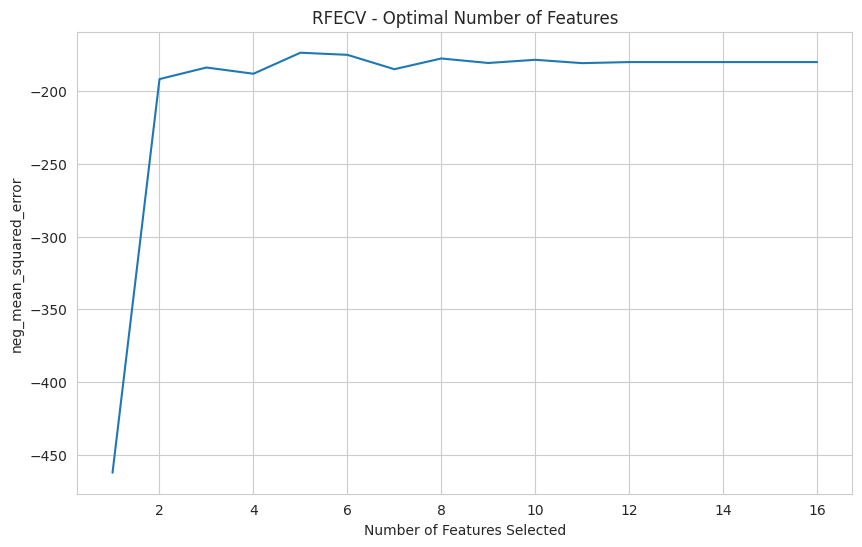

In [ ]:
# Take about about 2 mins to run
rfecv_pipeline.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("neg_mean_squared_error")
mean_score = rfecv.cv_results_['mean_test_score']
plt.plot(range(1, len(mean_score) + 1), mean_score)

optimal_num_features = rfecv.n_features_
optimal_socre = rfecv.cv_results_['mean_test_score'][optimal_num_features - 1]
print(f"Optimal number of features: {optimal_num_features}")
print(f"roc_auc at optimal number of features: {optimal_socre:.3f}")

In [ ]:
rfecv_pipeline.fit(X_train, y_train)
rfe_step = rfecv_pipeline.named_steps['feature_selection']

selected_feature_mask = rfe_step.support_
selected_feature_indices = np.where(selected_feature_mask)[0]

# Extract feature names from the pipeline
feature_names = []

# Numeric features excluding those subjected to PCA
numeric_features_excluding_pca = [col for col in continuous_features if col not in ["2019 Employees", "2020 Employees", "2021 Employees", "2022 Employees", "2019 Revenue/Yr", "2022 Revenue/Yr"]]
feature_names.extend(numeric_features_excluding_pca)

# Names for PCA transformed features
feature_names.extend(['PCA_employee', 'PCA_revenue'])

# Extracting feature names from OneHotEncoder
nominal_feature_names = prepare_pipeline.named_transformers_['nominal'].get_feature_names_out(nominal_features)
feature_names.extend(nominal_feature_names)

ordinal_feature_names = prepare_pipeline.named_transformers_['ordinal'].get_feature_names_out(ordinal_features)
feature_names.extend(ordinal_feature_names)

selected_feature_names = []
for i in selected_feature_indices:
  selected_feature_names.append(feature_names[i])

print(selected_feature_names)
print(len(selected_feature_names))

['Year Established', '2021 Revenue/Yr', '2020 Revenue/Yr', 'PCA_employee', 'PCA_revenue']
5


With rfecv_pipeline, we are ready to fit into models and start our comparison.

# **Model Building**

Before we start fitting in models, we first define the function for score evaluations to compare the results.

Before evaluating the test results, we also want to look at train scores. Therefore, we define two functions, print_train_scores and print_test_scores.

In [ ]:
# train evaluation
def print_train_scores(y_train, y_train_pred):
    mse = mean_squared_error(y_train, y_train_pred)
    mae = mean_absolute_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    rmse = np.sqrt(mse)

    print('Train scores are:')
    print(f'MSE: {mse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}, RMSE: {rmse:.3f}')

# test evaluation
def print_test_scores(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print('Test scores are:')
    print(f'MSE: {mse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}, RMSE: {rmse:.3f}')

def print_cross_val_scores(model_pipeline, X_train, y_train):
    # Only evaluating R2 score
    scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='r2')

    print(f'Cross-validation R2: {scores.mean():.3f} ± {scores.std():.3f}')

With the function, we can start build models and evaluate them.

## Random Forest

**Evaluate Perfromance on Train & Cross Validaton**

In [ ]:
# Create a pipeline that includes preprocessing and the classifier
rf_pipeline = make_pipeline(rfecv_pipeline, RandomForestRegressor(random_state=42, n_estimators=100))

# train the model
rf_pipeline.fit(X_train, y_train)

# Making predictions on the train set using the fitted pipeline
y_train_pred = rf_pipeline.predict(X_train)

print_train_scores(y_train, y_train_pred)

Train scores are:
MSE: 13.214, MAE: 1.174, R2: 0.978, RMSE: 3.635


In [ ]:
print_cross_val_scores(rf_pipeline, X_train, y_train)

Cross-validation R2: 0.851 ± 0.173


**Finetuning**

In [ ]:
# Set parameter range (about 12mins to run)
rf_param_dist =  {
    'randomforestregressor__max_depth': np.arange(5, 101, 5),
    'randomforestregressor__min_samples_leaf': np.arange(5, 151, 5)
}

# Create a RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(rf_pipeline,
                                      rf_param_dist,
                                      n_iter=20,
                                      cv=5,
                                      scoring='r2',
                                      random_state=42)

# Fit the random search to the data
rf_random_search.fit(X_train, y_train)

print('The best parameters are ', rf_random_search.best_params_)
print(f'Best r2 for Random Search is {rf_random_search.best_score_:.3f}')

The best parameters are  {'randomforestregressor__min_samples_leaf': 5, 'randomforestregressor__max_depth': 10}
Best r2 for Random Search is 0.874


**Evalute Performance on Test**

In [ ]:
# Updating the RandomForestClassifier in the pipeline with the best parameters
rf_pipeline.set_params(randomforestregressor__max_depth=rf_random_search.best_params_['randomforestregressor__max_depth'],
                       randomforestregressor__min_samples_leaf=rf_random_search.best_params_['randomforestregressor__min_samples_leaf'])

# Fit the data again
rf_pipeline.fit(X_train, y_train)

# Making predictions on the test set using the fitted pipeline
y_pred = rf_pipeline.predict(X_test)

# Evaluate performance on the test set
print_test_scores(y_test, y_pred)

Test scores are:
MSE: 10.106, MAE: 2.252, R2: 0.982, RMSE: 3.179


The Random Forest model returns an accuracy of 0.878, roc_auc of 0.934, recall of 0.830, and f1_score of 0.669 on the testing data after finetuning the hyperparameters. It has a good overall performance than the previous model.

### Important Features

In [ ]:
feature_importances = rf_pipeline.named_steps['randomforestregressor'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index().drop('index', axis = 1)
feature_importance_df = feature_importance_df[:10]
feature_importance_df

,Feature,Importance
0,PCA_employee,0.576243
1,Year Established,0.409241
2,2020 Revenue/Yr,0.006328
3,2021 Revenue/Yr,0.004855
4,PCA_revenue,0.003333


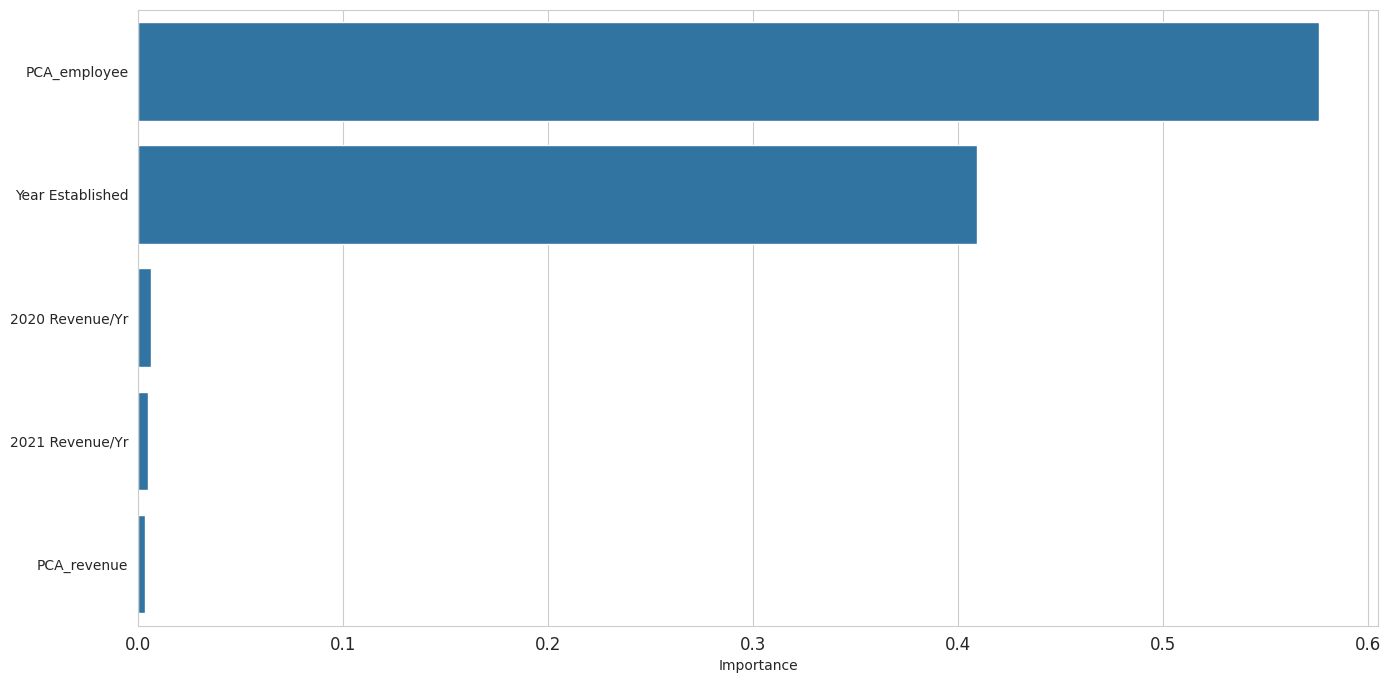

In [ ]:
#visualizing coefficients of most important features
plt.figure(figsize=[16, 8])
sns.barplot(x='Importance', y='Feature', data = feature_importance_df)
plt.ylabel('', fontsize=14)
plt.xlabel('Importance')
plt.xticks(fontsize=12)
plt.show()

# Deployment

Finally, to make the models available for use in a production environment, we save the models for future predictions on new data.

In [ ]:
# create new data
new_data = X_test.iloc[:20]

In [ ]:
joblib.dump(rf_pipeline, "purchasing_intention_model_random_forest.pkl")
rf_pipeline_reloaded = joblib.load("purchasing_intention_model_random_forest.pkl")

predictions = rf_pipeline_reloaded.predict(new_data)

print(predictions)

[69.64868599 87.17441384 91.13197285 87.03095347 88.99047865 90.09876974
 87.72726466 77.50772694 85.24518702 79.89336977 72.7414779  88.21012641
 76.42959149  0.92190476  0.92190476 78.41782326 69.07749351 90.16985039
 76.09449631 88.60744997]
